In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import _init_paths
from PIL import Image
import matplotlib.pyplot as plt
from ult.config import cfg

import _init_paths
import pickle
import json
import numpy as np
import cv2
import os
import sys

In [13]:
Detection = pickle.load( open( cfg.ROOT_DIR + "/Results/300000_iCAN_ResNet50_VCOCO.pkl", "rb" ) )

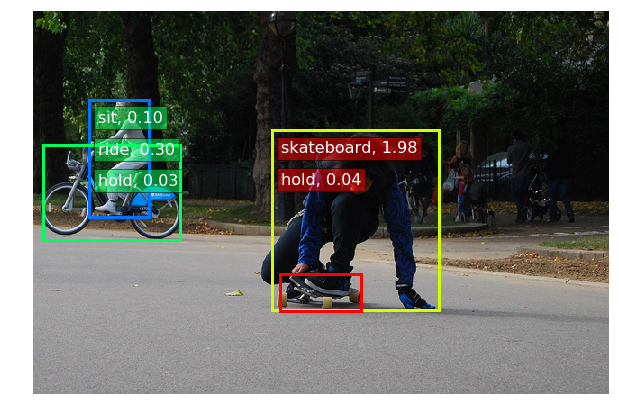

In [46]:
image_id = 2014
# 23359
#565248

cc = plt.get_cmap('hsv', lut=6)
dpi = 80

im_file = cfg.DATA_DIR + '/v-coco/coco/images/val2014/COCO_val2014_' + (str(image_id)).zfill(12) + '.jpg'
im_data = plt.imread(im_file)
height, width, nbands = im_data.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(im_data, interpolation='nearest')

HO_dic = {}
HO_set = set()
count = 0


for ele in Detection:
    if (ele['image_id'] == image_id):
        action_count = -1
        
        for action_key, action_value in ele.iteritems():
            if (action_key.split('_')[-1] != 'agent') and action_key != 'image_id' and action_key != 'person_box':
                if (not np.isnan(action_value[0])) and (action_value[4] > 0.01):
                    O_box = action_value[:4]
                    H_box = ele['person_box'] 
                    
                    action_count += 1
                    
                    if tuple(O_box) not in HO_set:
                        HO_dic[tuple(O_box)] = count
                        HO_set.add(tuple(O_box))
                        count += 1      
                    if tuple(H_box) not in HO_set:
                        HO_dic[tuple(H_box)] = count
                        HO_set.add(tuple(H_box))
                        count += 1 
                
                    ax.add_patch(
                    plt.Rectangle((H_box[0], H_box[1]),
                                  H_box[2] - H_box[0],
                                  H_box[3] - H_box[1], fill=False,
                                  edgecolor=cc(HO_dic[tuple(H_box)])[:3], linewidth=3)
                    )
                    text = action_key.split('_')[0] + ', ' + "%.2f" % action_value[4]


                    ax.text(H_box[0] + 10, H_box[1] + 25 + action_count * 35,
                        text,
                        bbox=dict(facecolor=cc(HO_dic[tuple(O_box)])[:3], alpha=0.5),
                        fontsize=16, color='white')

                    ax.add_patch(
                    plt.Rectangle((O_box[0], O_box[1]),
                                  O_box[2] - O_box[0],
                                  O_box[3] - O_box[1], fill=False,
                                  edgecolor=cc(HO_dic[tuple(O_box)])[:3], linewidth=3)
                    )
                    ax.set(xlim=[0, width], ylim=[height, 0], aspect=1)

In [45]:
for ele in Detection:

    for action_key, action_value in ele.iteritems():
        if (action_key == 'ride_instr') and action_key != 'image_id' and action_key != 'person_box':
            if (not np.isnan(action_value[0])) and (action_value[4] > 0.2):
                print(ele['image_id'])

2014
12744
12744
12744
16961
16961
16961
19324
19324
19324
23034
25282
27871
27871
27871
27871
35671
38828
38829
38829
38829
44065
44312
50713
50713
50713
56724
64240
64240
64240
64240
87740
87740
87920
92363
92363
96711
96711
97626
97626
97626
97626
97626
100434
100434
100434
101933
102411
103035
103035
108094
108094
112608
112608
115370
115370
116061
116061
116061
116061
116455
117222
121031
121031
121031
121123
123555
123555
124013
131494
131494
132796
132796
137803
138488
138503
143737
143737
144468
144468
144468
146112
146865
147740
156232
157657
157657
166255
168617
168617
169996
169996
171548
172710
178982
180524
180524
180524
183166
183166
183394
183394
183437
183437
196989
196989
204906
204906
206838
211189
211189
213592
213592
213592
213592
213592
214753
214753
221094
221094
226571
226571
227399
228071
231379
237618
237618
239130
242724
242724
244050
244455
244455
249301
249301
253964
253964
255649
255649
260166
260166
260238
260238
263834
265063
265063
267802
267802
267802
2